
# Regression Example
The example below uses a [marketing](https://scikit-learn.org/stable/datasets/toy_dataset.html) dataset,
in order to illustrate a regression activity.

## Workflow
1. Preparation
    1. Load the dataset from a `.csv` file and show a short description
    1. Data preparation, according to background information
    1. Set the __target__ variable, according to background information
    1. Show the two dimensional scatter plots for all the predicting variables with respect to the target
    1. Split the data into *predicting variables* `X` and *target* `y`
        1. here we set the `random_state` variable to make the experiment *repeatable* 
1. First experiment: compute the regression on a single predicting variable
    1. Consider a reduced dataset containing the chosen variable and the target
    1. Fit the `LinearRegression` estimator on the training set
    1. Show the statistical significance of the fitted model
    1. Predict the target for the test set using the *fitted* estimator
    1. Compute the regression coefficients and the quality measures: *Root Mean Squared Error (RMSE)* and *coefficient of determination (r2)*
1. Second experiment: compute the regression considering all the predicting variables
    1. Repeat the steps from 2.2 to 2.5
1. Third experiment: use the `DecisionTreeRegressor` with the entire dataset
    1. Fit the tree using the default hyperparameters, in order to find the 
    maximum depth of the unconstrained tree
    1. Use *cross-validation* to find the optimal *maximum depth* of the tree
    1. Fit the tree with the optmal `max_depth`
    1. Predict and show the *root mean squared error*
1. Fourth experiment: use the `RandomForestRegressor`
    1. Repeat steps from 4.2 to 4.4 (for simplicity, we use the maximum `max_depth` found in 4.1)


In [1]:
# Code source: Claudio Sartori 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
random_state = 94922767 # this will be used to guarantee the repeatability of the experiment

## Load the dataset from a `.csv` file and show a short description

In [24]:
url = "Lab_exercises/Lab-topic-4-regression/regression_example.csv"
df= pd.read_csv(url,index_col="idx")
display(df.head())
display(df.shape)

,F0,F1,F2,F3,F4,F5,F6,F7,response
idx,,,,,,,,,
0,1.509081,-1.049118,1.978885,1.060733,NaN,0.824655,0.819409,-1.157708,214.593802
1,0.644764,0.007172,0.004493,4.168748,-0.622817,1.855366,-0.540468,1.141118,151.951717
2,0.890241,1.080162,0.168031,0.002733,0.522478,0.407804,1.629592,-1.102599,117.280863
3,-0.212410,-1.034267,1.843441,4.486992,-0.610050,0.734101,-0.142660,-0.172119,229.358473
4,-0.827402,-2.048496,-0.066242,1.361695,1.268456,-1.084906,1.986556,0.425511,230.153189


(843, 9)

## Data Exploration and preparation

##### Show a short description of the columns

In [25]:
df.describe()

,F0,F1,F2,F3,F4,F5,F6,F7,response
count,802.000000,807.000000,812.000000,8.020000e+02,805.000000,808.000000,806.000000,812.000000,813.000000
mean,-0.037473,0.008466,-0.059965,9.616777e-01,-0.093113,0.034653,-0.019928,-0.034976,3.798356
std,1.038115,0.973884,0.991280,1.286476e+00,1.050385,0.957238,0.997345,0.963010,114.189124
min,-3.700229,-2.832440,-4.141473,2.007427e-08,-4.072767,-2.968219,-2.850505,-3.948627,-358.659591
25%,-0.723630,-0.640017,-0.681924,8.725649e-02,-0.802553,-0.625219,-0.689671,-0.662887,-73.823652
50%,-0.032953,0.005693,-0.050789,4.707895e-01,-0.090512,0.051123,-0.014592,-0.049392,-0.159154
75%,0.629368,0.681480,0.587393,1.350123e+00,0.611545,0.689203,0.612939,0.614423,75.487094
max,3.043062,2.945731,2.925432,9.200073e+00,3.024952,3.210373,2.861549,3.000174,422.794685


##### Show the number of rows with nulls

It is computed subtracting the number of rows in the dataset without nulls from the original number of rows

In [27]:
df.count()

F0          802
F1          807
F2          812
F3          802
F4          805
F5          808
F6          806
F7          812
response    813
dtype: int64

#### Drop data that are useless or not usable

In [28]:
df= df.dropna()
print(f"Shape of final dataset {df.shape[0]} rows and {df.shape[1]} columns.")

Shape of final dataset 570 rows and 9 columns.


In [23]:
df.head()

,idx,F0,F1,F2,F3,F4,F5,F6,F7,response
1,1,0.644764,0.007172,0.004493,4.168748,-0.622817,1.855366,-0.540468,1.141118,151.951717
2,2,0.890241,1.080162,0.168031,0.002733,0.522478,0.407804,1.629592,-1.102599,117.280863
3,3,-0.212410,-1.034267,1.843441,4.486992,-0.610050,0.734101,-0.142660,-0.172119,229.358473
4,4,-0.827402,-2.048496,-0.066242,1.361695,1.268456,-1.084906,1.986556,0.425511,230.153189
5,5,-0.635465,-1.112850,-0.330580,6.141348,1.914527,0.408895,-0.364722,-0.731382,-261.116572


## Choose the target and split the data into *predicting variables* `X` and *target* `y`

In [59]:
from sklearn.model_selection import train_test_split

target = "response"
x = df.drop(target,axis =1)
y= df[target]



## Show the two dimensional scatter plots for all the predicting variables with respect to the target

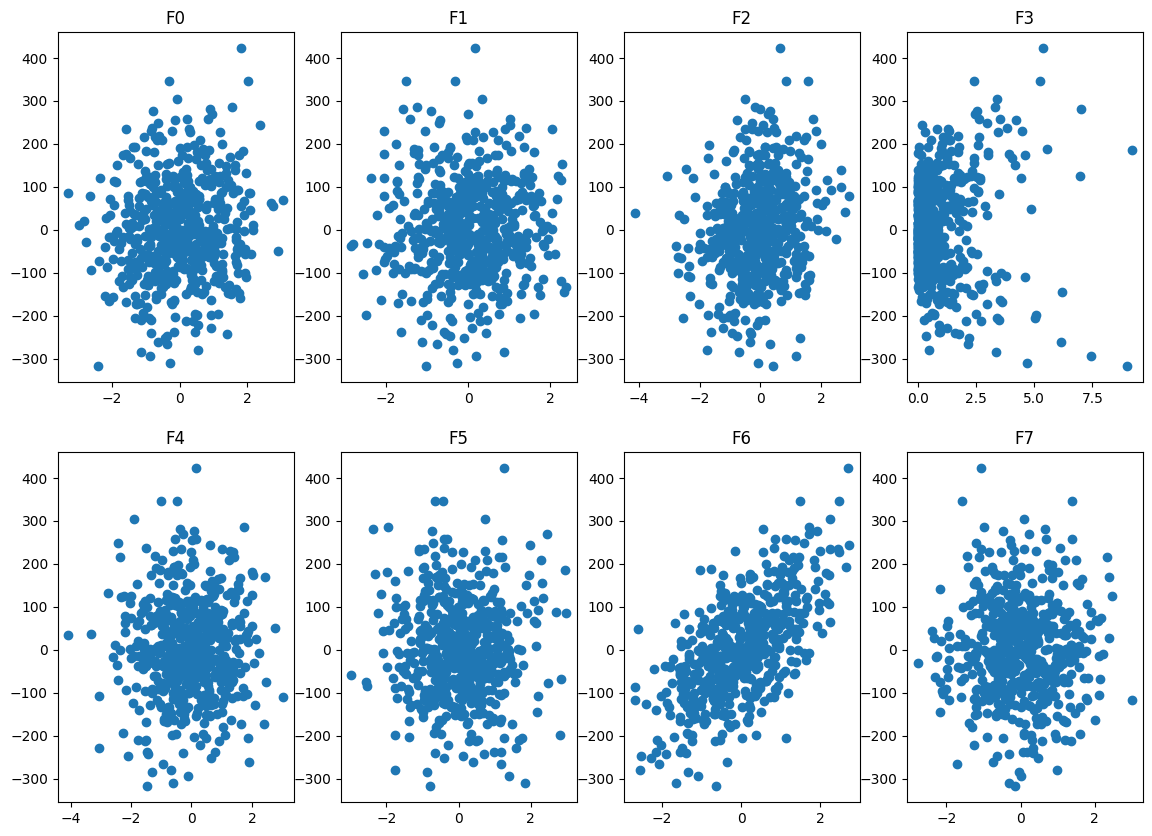

In [60]:
fig,axes = plt.subplots(2,4,figsize= (14,10))
axes = axes.flatten()
for ax, col in zip(axes,x.columns):
    # plt.subplot(ax=ax)
    ax.scatter(x[col],y )
    ax.set_title(col)
    
plt.show()


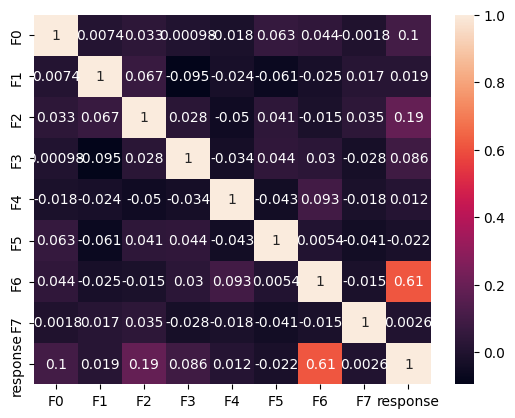

In [63]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr,annot= True)
plt.show()


## Split the data into *train* and *test* and show the sizes of the two parts
Here we set the `random_state` variable to make the experiment *repeatable*


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state= random_state)
display(x_train.shape)
display(x_test.shape)
display(y_train.shape)
display(y_test.shape)

(427, 8)

(143, 8)

(427,)

(143,)

## 2. First experiment - univariate linear regression
We choose the variable exhibiting the highest correlation with respect to the target

Consider a reduced dataset containing the chosen variable and the target

In [ ]:
correlated_col = 'F6'


,F0,F1,F2,F3,F4,F5,F6,F7
idx,,,,,,,,
622,-0.634909,-0.256423,1.000338,0.461176,0.152928,0.212889,0.881496,-2.147873
394,-0.007863,-0.665316,0.850984,0.001165,-0.557261,-0.123502,0.585805,0.322786
283,0.128823,0.356771,-0.832611,2.028931,-0.904161,-0.799075,0.861987,-1.167697
506,-1.311996,0.010411,0.515424,0.250295,0.252400,0.803305,-1.196339,0.955341
628,-2.003367,0.534600,-0.322324,0.036095,-0.805870,-0.205362,-0.123225,0.115427
...,...,...,...,...,...,...,...,...
259,0.636139,0.705095,-0.863632,0.029687,0.365675,0.509191,-0.214038,0.773137
242,-1.855450,-1.024890,0.402532,1.564499,0.459862,0.578216,0.642865,-1.151247
105,0.045296,0.165350,-2.143683,1.510721,0.465791,0.459078,0.355984,0.657170


### Fit the `linear_model` estimator on the training set and predict the target for the test set using the *fitted* estimator

In [70]:
model = linear_model.LinearRegression()
df_f6 = pd.DataFrame(x_train[correlated_col])
model.fit(df_f6,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Compute the quality measures

In [76]:
df_f6_test = pd.DataFrame(x_test[correlated_col])
y_pred = model.predict(df_f6_test)
mean_error = mean_squared_error(y_test,y_pred)
display(mean_error)
r2 = r2_score(y_test,y_pred)
display(r2)


6747.689462886404

0.40195083014068755

## Second experiment: compute the regression considering all the predicting variables

### Now we use the entire data in `X_train` and `X_test` for fitting and predicting

In [ ]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


6196.287034561928

0.4508217460788968

### Fit, predict and show the results
Now we see the *regression coefficients* resulting from the fitting. 

In particular, *positive coefficients* indicate that the target *increases* with the variable, *negative coefficients* indicate a *decreasing* trend.

The absolute values of the coefficient cannot be considered directly a measure of importance, due to the possibly different orders of magnitude of the data in the different columns (observe above the outputs of `describe`).

In [80]:
pd.DataFrame({'Variable': x.columns, 'Coefficient': model.coef_})

,Variable,Coefficient
0,F0,9.481032
1,F1,1.696076
2,F2,22.463360
3,F3,4.905572
4,F4,-4.734401
5,F5,-5.063354
6,F6,70.522297
7,F7,-0.327347


#### Compute the quality measures

In [81]:
mean_error = mean_squared_error(y_test,y_pred)
display(mean_error)
r2 = r2_score(y_test,y_pred)
display(r2)

6196.287034561928

0.4508217460788968

## Decision Tree Multivariate Regresson

In [82]:
# Create Decision Tree regression object
from sklearn.tree import DecisionTreeRegressor

#### Fit the tree with default hyperparameters, and find the maximum depth of the unconstrained tree

In [89]:
model = DecisionTreeRegressor(random_state=random_state)
model.fit(x_train,y_train)
model.get_depth()

23

#### Find the optimal value of the hyperparameter `max_depth` with *cross-validation*
The optimization searches for the *maximum tree depth* guaranteing the smallest mean squared error
At the end, this operation returns also the *fitted best tree* `best_estimator_`

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': list(range(1,model.get_depth()))}
# create the grid search cross validation object
dt_gscv = GridSearchCV(estimator=DecisionTreeRegressor(random_state=random_state)
                    , param_grid=param_grid
                    , scoring='neg_mean_squared_error' # select model with minimum mse
                    )
dt_gscv.fit(x_train,y_train)
dt_best = dt_gscv.best_estimator_ # the GridSearchCV returns the best estimator
best_max_depth = dt_best.tree_.max_depth
print("The optimal maximum depth for the decision tree is {}".format(best_max_depth))


The optimal maximum depth for the decision tree is 2


In [93]:
y_test_pred_dt = dt_best.predict(x_test)

rmse_dt = mean_squared_error(y_test, y_test_pred_dt)

print("Decision Tree Regression - RMSE = {:.2f}".format(rmse_dt))


Decision Tree Regression - RMSE = 7778.85


#### Show the tree

[Text(0.5, 0.8333333333333334, 'F6 <= 0.493\nsquared_error = 13519.563\nsamples = 427\nvalue = 1.694'),
 Text(0.25, 0.5, 'F6 <= -1.071\nsquared_error = 9814.999\nsamples = 301\nvalue = -35.558'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 8258.813\nsamples = 62\nvalue = -112.814'),
 Text(0.375, 0.16666666666666666, 'squared_error = 8268.707\nsamples = 239\nvalue = -15.516'),
 Text(0.75, 0.5, 'F6 <= 2.236\nsquared_error = 11135.212\nsamples = 126\nvalue = 90.683'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 9298.941\nsamples = 120\nvalue = 80.699'),
 Text(0.875, 0.16666666666666666, 'squared_error = 5992.892\nsamples = 6\nvalue = 290.368')]

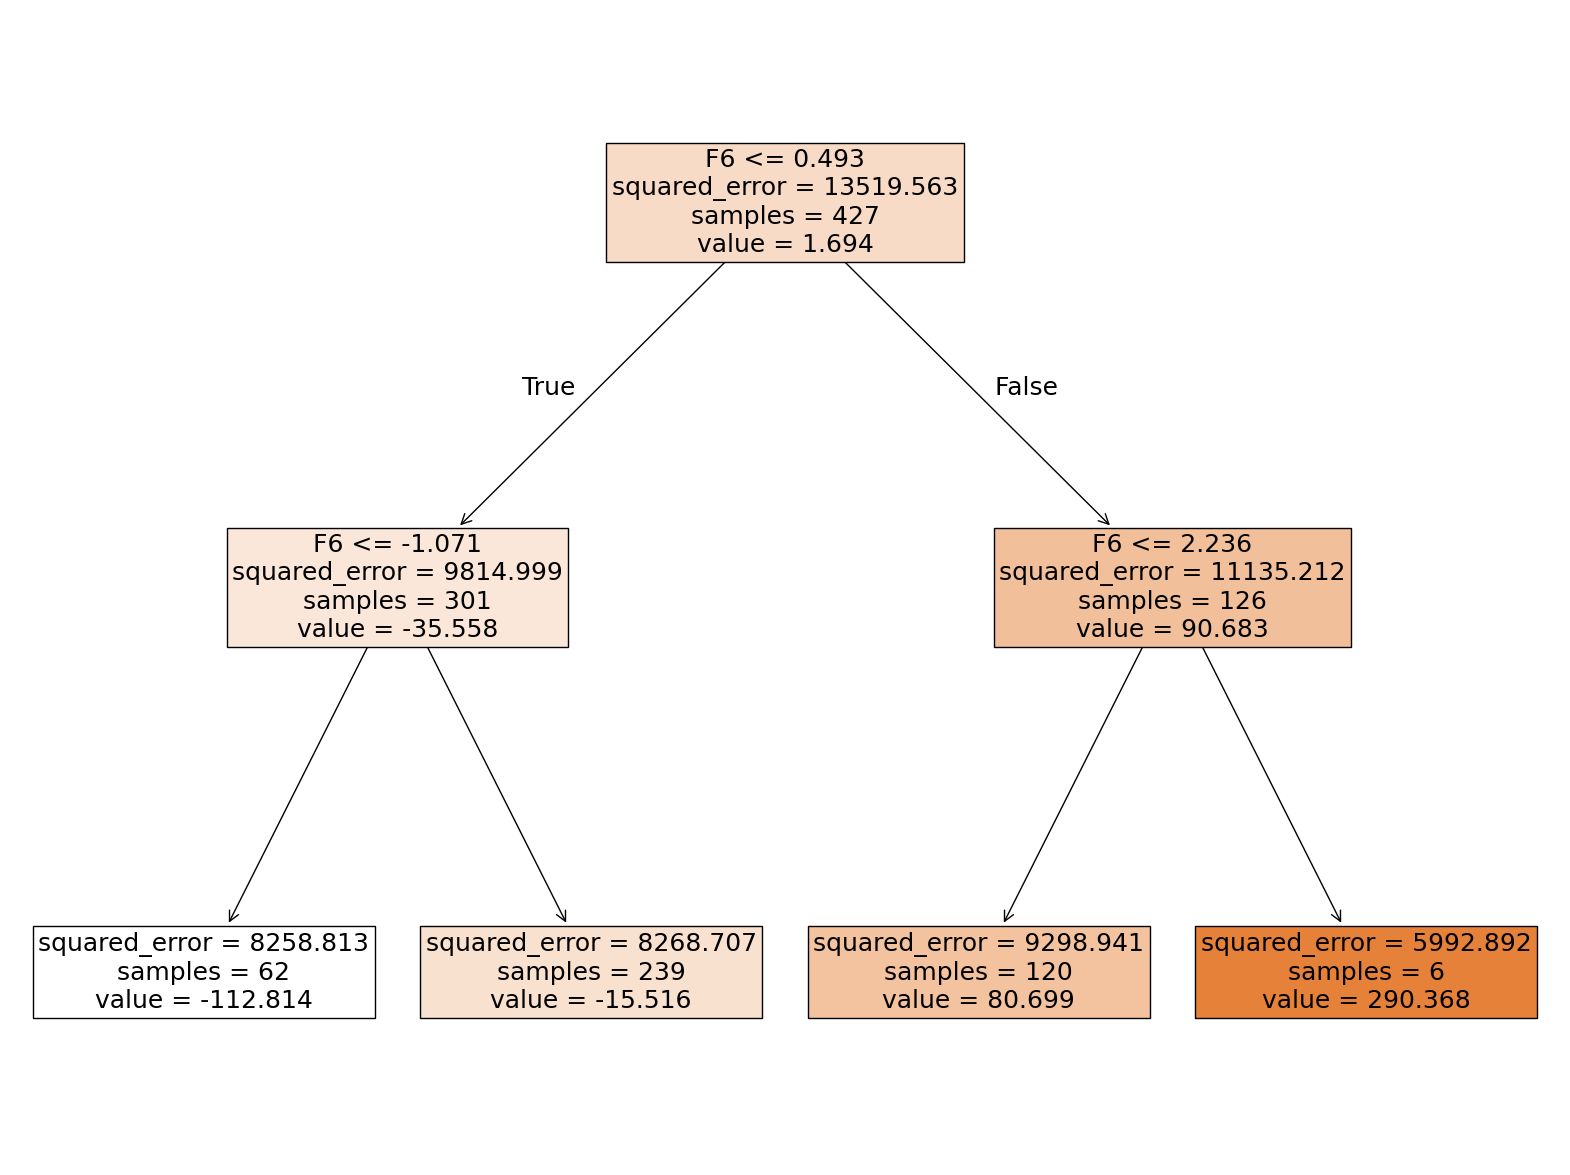

In [94]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure

from sklearn.tree import plot_tree
from matplotlib.pyplot import figure
figure(figsize = (20,15))
plot_tree(dt_best
          , filled = True # fills nodes with colors related to classes
                          # darker color means higher purity
          , feature_names = x.columns.tolist()
          , max_depth=3
          , fontsize=18
        #   , class_names = df[target].unique()
         )


## Random Forest Multivariate Regresson

In [96]:
# Create Random Forest regression object
from sklearn.ensemble import RandomForestRegressor


In [97]:
rf = RandomForestRegressor(random_state=random_state)
# for simplicity, we use as a maximum maximum depth of the tree the value found in
# the unconstrained decision tree fitting
param_grid_rf = {'max_depth': list(range(1,model.get_depth()))
}
# create the grid search with cross validation
rf_gscv = GridSearchCV(rf, param_grid=param_grid_rf
                        , scoring='neg_mean_squared_error') # look for minimum mean square error

# Train the model using the training set
rf_gscv.fit(x_train, y_train)

# the grid search returns the best estimator
rf = rf_gscv.best_estimator_
print("The optimal maximum depth for the trees in the random forest is {}".format(rf.max_depth))

The optimal maximum depth for the trees in the random forest is 6


In [98]:
y_test_pred_rf = rf.predict(x_test)
rmse_rf = mean_squared_error(y_test, y_test_pred_rf)
print("Random Forest Regression - RMSE = {:.2f}".format(rmse_rf))

Random Forest Regression - RMSE = 6827.51


### Plot the prediction of every model, using as x axis the predicting variable used in the first experiment, compare the predction with the real test set, and print the metrics $R^2$ and RMSE 

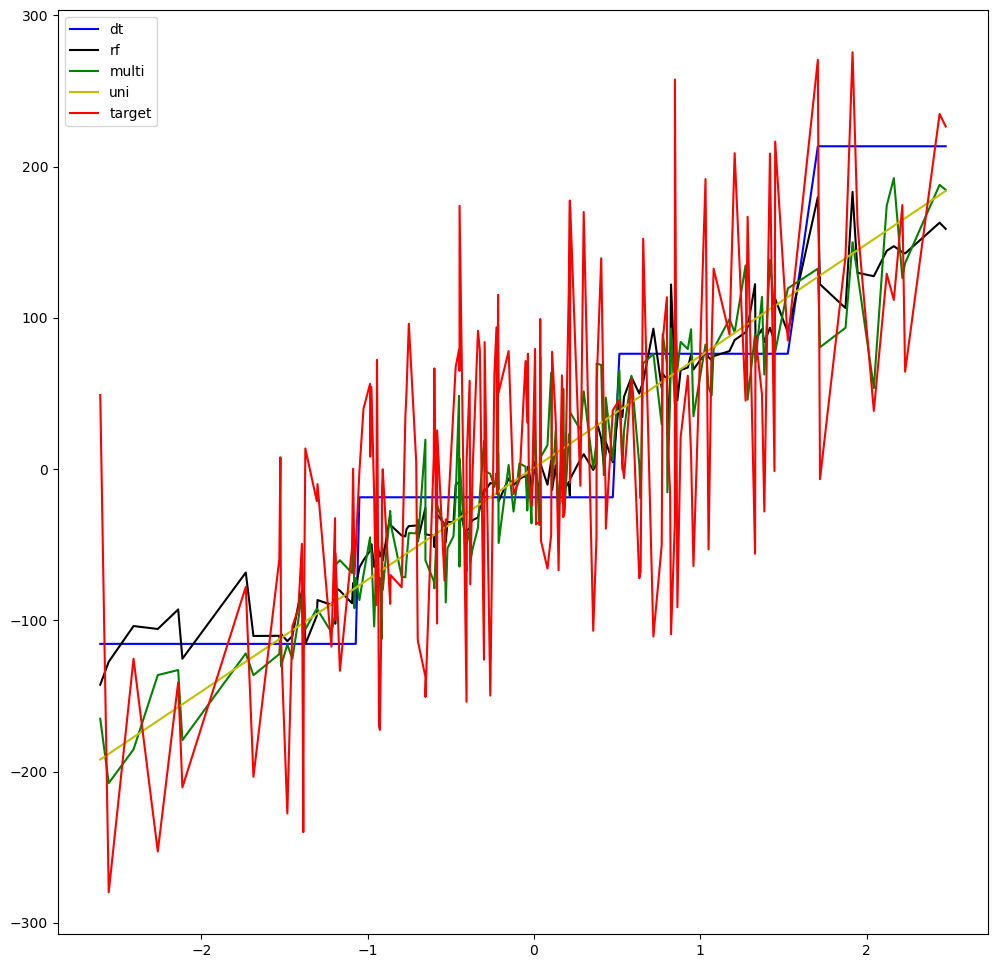

In [ ]:
# for this section we too name diffrenly. done

,Model,RMSE,R_square
0,Linear Univariate on F6,85.122,0.338
1,Linear Multivariate,81.104,0.399
2,Decision Tree Regressor,89.827,nan
3,Random Forest Regressor,84.701,nan


## Final observations
### Linear regression
The multivariate regression with all the predicting variables available with respect to the univariate regression has 
- lower RMSE 
- higher coefficient of determination 

### Decision Tree and Random Forest regression
- Decision Tree and Random Forest have an RMSE slightly higher than multivariate linear regression



## Control questions
1. observing the multi-variate experiment, what variable has the higher effect on the target?
1. is there a variable having an almost negligible effect on the target?
1. try to repeat the univariate experiment with other columns and comment the results